<a href="https://colab.research.google.com/github/Puja-Nayak/Blackcoffer_assignment/blob/main/twitter_tweet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import warnings

warnings.filterwarnings('ignore',category=DeprecationWarning)

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('./gdrive')

Mounted at ./gdrive


In [ ]:
import os

In [ ]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train[train['target'] ==1 ]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
combi=train.append(test,ignore_index=True)

In [ ]:
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)

  return input_txt

combi['tidy_text'] = np.vectorize(remove_pattern)(combi['text'],"@[W]*")

In [ ]:
combi['tidy_text']= combi['tidy_text'].str.replace("[^a-zA-Z#]"," ")

<ipython-input-9-48ce06f898f9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_text']= combi['tidy_text'].str.replace("[^a-zA-Z#]"," ")


In [ ]:
combi['tidy_text'] = combi['tidy_text'].apply(lambda x:' '.join([W for W in x.split()if len(W)>3]))

In [ ]:
combi.head()

,id,keyword,location,text,target,tidy_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0,Deeds Reason this #earthquake ALLAH Forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,Forest fire near Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0,residents asked shelter place being notified o...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0,people receive #wildfires evacuation orders Ca...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0,Just sent this photo from Ruby #Alaska smoke f...


In [ ]:
tokenized_text = combi['tidy_text'].apply(lambda x: x.split())

In [ ]:
tokenized_text.head()

0    [Deeds, Reason, this, #earthquake, ALLAH, Forg...
1            [Forest, fire, near, Ronge, Sask, Canada]
2    [residents, asked, shelter, place, being, noti...
3    [people, receive, #wildfires, evacuation, orde...
4    [Just, sent, this, photo, from, Ruby, #Alaska,...
Name: tidy_text, dtype: object

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
    
tokenized_text = tokenized_text.apply(lambda x: [stemmer.stem(i) for i in x])


In [ ]:
tokenized_text.head()

0       [deed, reason, thi, #earthquak, allah, forgiv]
1             [forest, fire, near, rong, sask, canada]
2    [resid, ask, shelter, place, be, notifi, offic...
3    [peopl, receiv, #wildfir, evacu, order, califo...
4    [just, sent, thi, photo, from, rubi, #alaska, ...
Name: tidy_text, dtype: object

In [ ]:
for i in range(len(tokenized_text)):
  tokenized_text[i] = ''. join(tokenized_text[i])

combi['tidy_text'] = tokenized_text

In [ ]:
combi.head()

,id,keyword,location,text,target,tidy_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0,deedreasonthi#earthquakallahforgiv
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,forestfirenearrongsaskcanada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0,residaskshelterplacebenotifiofficotherevacushe...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0,peoplreceiv#wildfirevacuordercalifornia
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0,justsentthiphotofromrubi#alaskasmokefrom#wildf...


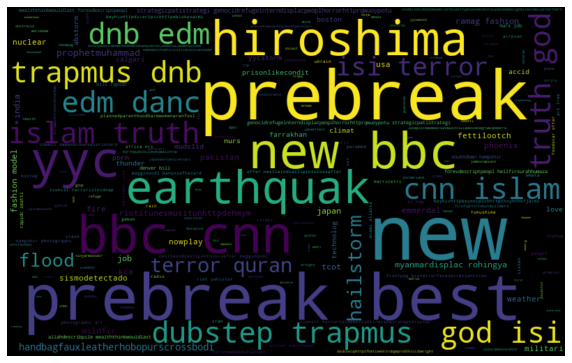

In [ ]:
all_words = ''.join([text for text in combi['tidy_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

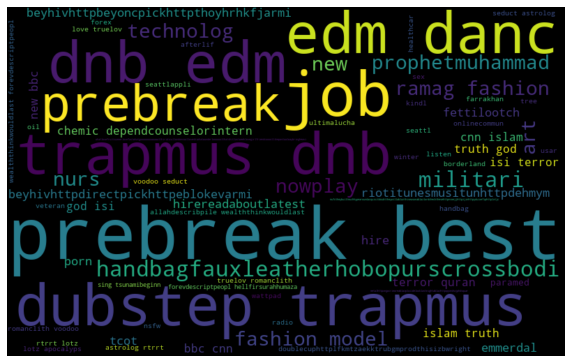

In [ ]:
normal_words = ''.join([text for text in combi['tidy_text'][combi['target'] == 0]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

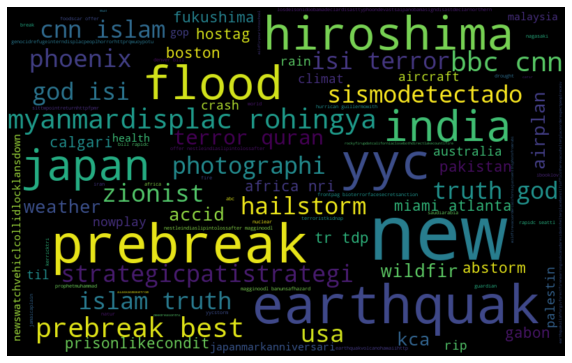

In [ ]:
negative_words = ''.join([text for text in combi['tidy_text'][combi['target'] == 1]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def hashtag_extract(x):
  hashtags = []
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)

  return hashtags

HT_regular = hashtag_extract(combi['tidy_text'][combi['target'] == 0])

HT_negative = hashtag_extract(combi['tidy_text'][combi['target'] == 1])

HT_regular = sum(HT_regular , [])
HT_negative = sum(HT_negative, [])


In [ ]:
from nltk import FreqDist

fd = FreqDist()

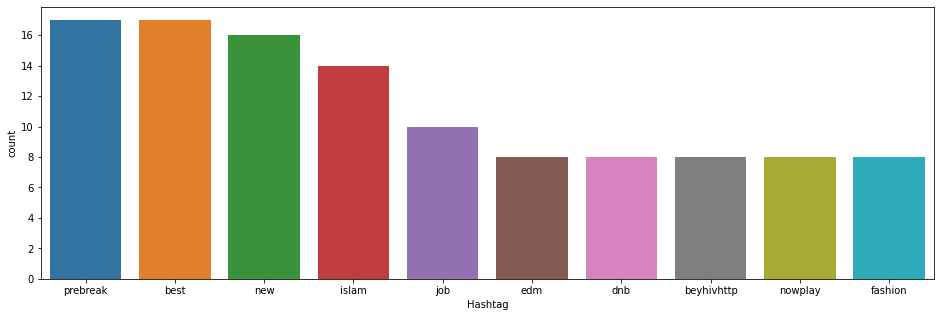

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                 'count': list(a.values())})
d = d.nlargest(columns = "count",n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x = "Hashtag",y = "count")
ax.set(ylabel='count')
plt.show()

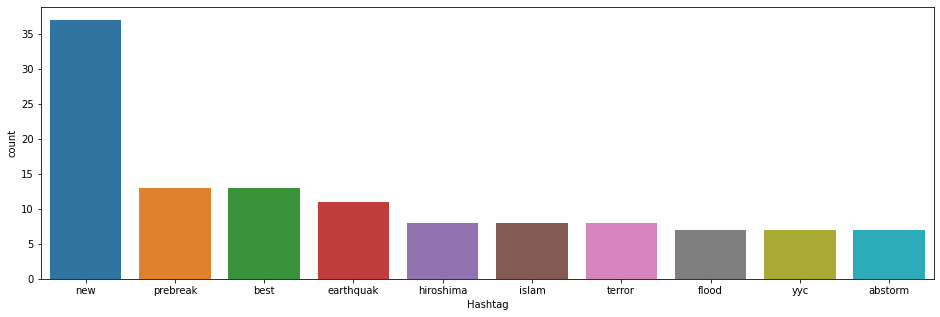

In [ ]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()),
                 'count': list(b.values())})
e = e.nlargest(columns = "count",n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data = e,x = "Hashtag",y = "count")
ax.set(ylabel='count')
plt.show()